Initial shape: (15000, 17)
Exact duplicate rows: 0
Duplicate faculty_id: 0


,faculty_id,academic_rank,tenure_status,years_at_institution,base_salary,teaching_load,research_funding,institution_type,department_size,admin_support,work_life_balance,department_collaboration,promotion_opportunities,publications_last_3_years,student_evaluation_avg,job_market_alternatives,left_institution
0,1,Associate Professor,Tenure-Track,3,70974.758663,6,9960.082453,Community College,Medium,1,3,8,1,7,3.520074,9,0
1,2,Full Professor,Non-Tenure,16,69482.774557,3,108309.536130,Liberal Arts College,Medium,3,3,2,9,4,3.811163,4,0
2,3,Lecturer,Non-Tenure,19,91434.392986,2,10044.468010,Research University,Medium,9,5,9,3,4,3.539667,7,0
3,4,Associate Professor,Non-Tenure,24,65850.710135,6,4159.726828,Research University,Small,5,7,6,1,5,4.351417,9,1
4,5,Associate Professor,Non-Tenure,39,30000.000000,7,10718.111809,Community College,Small,6,6,8,8,5,3.932108,2,0


Train shape: (12000, 15)
Test shape: (3000, 15)

Train target distribution:
left_institution
0    0.726667
1    0.273333
Name: proportion, dtype: float64
Categorical columns: ['academic_rank', 'tenure_status', 'institution_type', 'department_size']
Numeric columns: ['years_at_institution', 'base_salary', 'teaching_load', 'research_funding', 'admin_support', 'work_life_balance', 'department_collaboration', 'promotion_opportunities', 'publications_last_3_years', 'student_evaluation_avg', 'job_market_alternatives']
Preprocessor fitted successfully!
Processed shape: (12000, 40)
shape of training data (12000, 15)
shape of testing data (3000, 15)


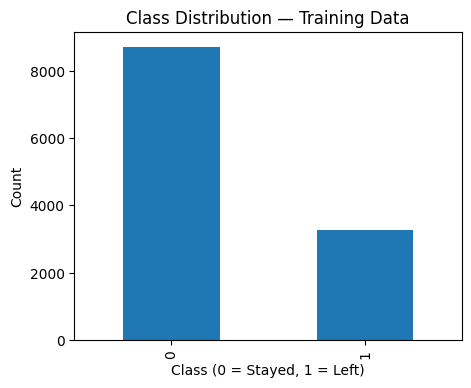


Class Distribution:
left_institution
0    0.726667
1    0.273333
Name: proportion, dtype: float64


In [7]:
%run "./02_Preprocessing.ipynb"

import matplotlib.pyplot as plt
import seaborn as sns

print("shape of training data",X_train.shape)
print("shape of testing data",X_test.shape)

plt.figure(figsize=(5,4))
y_train.value_counts().plot(kind='bar')
plt.title("Class Distribution — Training Data")
plt.xlabel("Class (0 = Stayed, 1 = Left)")
plt.ylabel("Count")
plt.show()

print("\nClass Distribution:")
print(y_train.value_counts(normalize=True))

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Baseline Random Forest model (default settings)
rf_clf = RandomForestClassifier(
    n_estimators=100,      # number of trees
    random_state=42,       # reproducibility
    n_jobs=-1              # use all CPU cores
)

# Create pipeline: preprocessing + RF model
rf_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("rf", rf_clf)
])


In [9]:
# ============================================
# STEP 3 — Train Baseline Random Forest
# ============================================


# Fit model on TRAIN data
rf_pipeline.fit(X_train, y_train)

print("Training complete!")

# Predict on TEST data
y_pred_rf = rf_pipeline.predict(X_test)

# Show basic accuracy
from sklearn.metrics import accuracy_score
baseline_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"\nBaseline Random Forest Accuracy: {baseline_accuracy:.4f}")


Training complete!

Baseline Random Forest Accuracy: 0.7613


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, recall_score

rf_tuned = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=20,
    min_samples_leaf=8,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_tuned_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("rf", rf_tuned)
])

# Fit
rf_tuned_pipeline.fit(X_train, y_train)

# Predict
y_prob = rf_tuned_pipeline.predict_proba(X_test)[:, 1]
y_pred = rf_tuned_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall (class 1):", recall_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7193333333333334
Recall (class 1): 0.6939024390243902
AUC: 0.7987362944730365

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.73      0.79      2180
           1       0.49      0.69      0.57       820

    accuracy                           0.72      3000
   macro avg       0.68      0.71      0.68      3000
weighted avg       0.76      0.72      0.73      3000



In [11]:
import numpy as np
from sklearn.metrics import recall_score, precision_score, f1_score

thresholds = [0.50, 0.40, 0.35, 0.30, 0.25, 0.20]

print("\n===== Threshold Tuning =====")
for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    print(f"\nThreshold = {t}")
    print("Recall :", recall_score(y_test, y_pred_t))
    print("Precision:", precision_score(y_test, y_pred_t))
    print("F1:", f1_score(y_test, y_pred_t))



===== Threshold Tuning =====

Threshold = 0.5
Recall : 0.6939024390243902
Precision: 0.49051724137931035
F1: 0.5747474747474748

Threshold = 0.4
Recall : 0.8780487804878049
Precision: 0.4090909090909091
F1: 0.5581395348837209

Threshold = 0.35
Recall : 0.9536585365853658
Precision: 0.37759536455818443
F1: 0.5409892770667589

Threshold = 0.3
Recall : 0.9890243902439024
Precision: 0.3606047132058693
F1: 0.5285109156076898

Threshold = 0.25
Recall : 0.9951219512195122
Precision: 0.35248380129589635
F1: 0.5205741626794258

Threshold = 0.2
Recall : 0.998780487804878
Precision: 0.35014963659683623
F1: 0.5185185185185185
